In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('visualization_daft_ie.csv')

## Dataset Variables for Your Reference

The dataset includes the following variables:

- **Price**: The listed price of the property in Euros.
- **NumBedrooms**: The number of bedrooms in the property.
- **NumBathrooms**: The number of bathrooms in the property.
- **PropertySize**: The total size of the property in square meters.
- **Total_Images**: The number of images available for the property listing.
- **Longitude**: The geographical longitude coordinate of the property.
- **Latitude**: The geographical latitude coordinate of the property.
- **BER_Rating**: The Building Energy Rating (BER) of the property, indicating energy efficiency (A1, B2, etc.).
- **FeaturedLevel**: The level of prominence given to the listing on the platform (e.g., featured or standard).
- **PropertyType**: The type of property, such as house, apartment, duplex, etc.
- **SellerType**: The type of seller listing the property, either an individual or an agency.


In [3]:
df

price  numBedrooms  numBathrooms  propertySize  total_images  \
0     290000            3             3          96.0          16.0   
1     225000            3             2          93.0          33.0   
2     575000            4             3         162.0          38.0   
3     120000            3             1          68.0           5.0   
4     400000            4             3         113.0          20.0   
...      ...          ...           ...           ...           ...   
3573  185000            4             3         125.0          34.0   
3574  235000            3             3         103.0          24.0   
3575  149500            3             1          82.0          14.0   
3576  170000            4             2         128.0          38.0   
3577  250000            3             2         116.0          69.0   

      longitude   latitude  publishDate_numeric ber_rating featuredLevel  \
0     -8.382500  51.822940           1643328000         C2      featured   
1     -7.177098  53.157465           1643328000         C1      featured   
2     -6.342763  53.269493           1643241600         A3      featured   
3     -6.879797  53.728601           1643328000          G      featured   
4     -8.614786  51.883612           1643500800         C1      featured   
...         ...        ...                  ...        ...           ...   
3573  -8.315556  51.849705           1639353600         A3      standard   
3574  -7.212145  53.647194           1642982400         A1      standard   
3575  -6.753848  54.115088           1643500800         A3      standard   
3576  -8.652927  52.664558           1638576000         A2      standard   
3577  -6.792938  53.166008           1643500800         A3      standard   

        propertyType       sellerType  
0     End of Terrace    BRANDED_AGENT  
1             Semi-D    BRANDED_AGENT  
2             Semi-D    BRANDED_AGENT  
3            Terrace    BRANDED_AGENT  
4             Semi-D    BRANDED_AGENT  
...              ...              ...  
3573          Semi-D    BRANDED_AGENT  
3574          Semi-D    BRANDED_AGENT  
3575        Bungalow  UNBRANDED_AGENT  
3576        Detached    BRANDED_AGENT  
3577        Bungalow  UNBRANDED_AGENT  

[3578 rows x 12 columns]

In [4]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [5]:
import folium
from folium.plugins import MarkerCluster

# open the map around the avg location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# group nearby markers 
marker_cluster = MarkerCluster().add_to(mymap)

# Add each property as a marker on the map
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Index: {idx}, Price: {row['price']}, Bedrooms: {row['numBedrooms']}, Bathrooms: {row['numBathrooms']}",
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster)


# Display the map (i think only works in Jupyter environment)
mymap


In [6]:
# checking latitude and longitute of the row that was set in USA
# house link on google: https://www.cohalandowning.ie/property/6-ashgrove-drive-ballyvolane/
df[3526:3527]

price  numBedrooms  numBathrooms  propertySize  total_images  \
3526  295000            3             1          84.0           4.0   

      longitude  latitude  publishDate_numeric ber_rating featuredLevel  \
3526    -8.4446   51.9044           1642982400        XXX      standard   

     propertyType     sellerType  
3526     Detached  BRANDED_AGENT

In [7]:
# change type from object to categorical values
df['ber_rating'] = df['ber_rating'].astype('category')
df['featuredLevel'] = df['featuredLevel'].astype('category')
df['propertyType'] = df['propertyType'].astype('category')
df['sellerType'] = df['sellerType'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                3578 non-null   int64   
 1   numBedrooms          3578 non-null   int64   
 2   numBathrooms         3578 non-null   int64   
 3   propertySize         3578 non-null   float64 
 4   total_images         3578 non-null   float64 
 5   longitude            3578 non-null   float64 
 6   latitude             3578 non-null   float64 
 7   publishDate_numeric  3578 non-null   int64   
 8   ber_rating           3578 non-null   category
 9   featuredLevel        3578 non-null   category
 10  propertyType         3578 non-null   category
 11  sellerType           3578 non-null   category
dtypes: category(4), float64(4), int64(4)
memory usage: 239.0 KB


In [9]:
df.describe()

price  numBedrooms  numBathrooms  propertySize  total_images  \
count  3.578000e+03  3578.000000   3578.000000   3578.000000   3578.000000   
mean   3.449569e+05     3.108440      2.065400    117.500838     18.735886   
std    2.664347e+05     1.146024      1.085742     63.460832     10.637171   
min    2.000000e+04     1.000000      1.000000      1.000000      0.000000   
25%    1.986250e+05     2.000000      1.000000     78.000000     12.000000   
50%    2.800000e+05     3.000000      2.000000    102.000000     17.000000   
75%    3.950000e+05     4.000000      3.000000    135.000000     23.000000   
max    4.500000e+06    16.000000     13.000000    579.000000    104.000000   

         longitude     latitude  publishDate_numeric  
count  3578.000000  3578.000000         3.578000e+03  
mean     -7.341592    53.131521         1.642938e+09  
std       1.136380     0.675296         9.022796e+05  
min     -10.377464    51.486204         1.638317e+09  
25%      -8.403228    52.669098         1.642982e+09  
50%      -6.958348    53.302160         1.643328e+09  
75%      -6.292596    53.424796         1.643414e+09  
max      -6.028016    55.299693         1.643501e+09

In [22]:
print(f"Max price:€{df['price'].max()} \nMin price:€{df['price'].min()} ")

Max price:€4500000 
Min price:€20000 


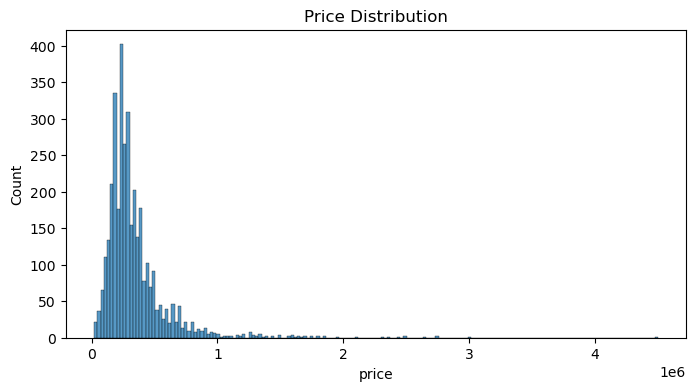

In [23]:
#  1e6 is scientific notation for 10^6 which is 1000000 (1 million)
plot_or_count_distribution(df, 'price', 'Price Distribution')

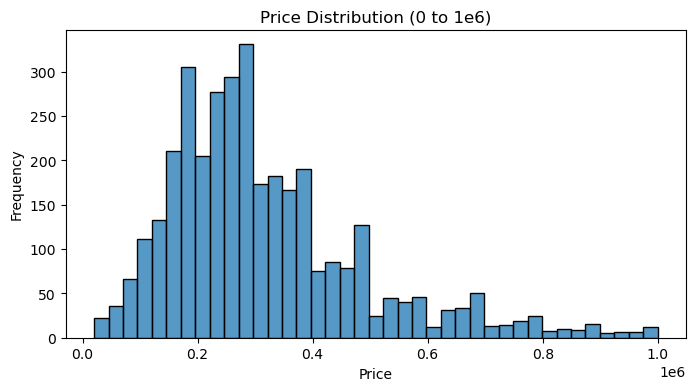

In [24]:
filtered_df = df[(df['price'] > 0) & (df['price'] <= 1e6)]
    
# Plotting the filtered data between 0 to 1m
plt.figure(figsize=(8, 4))
sns.histplot(filtered_df['price'])
plt.title('Price Distribution (0 to 1e6)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

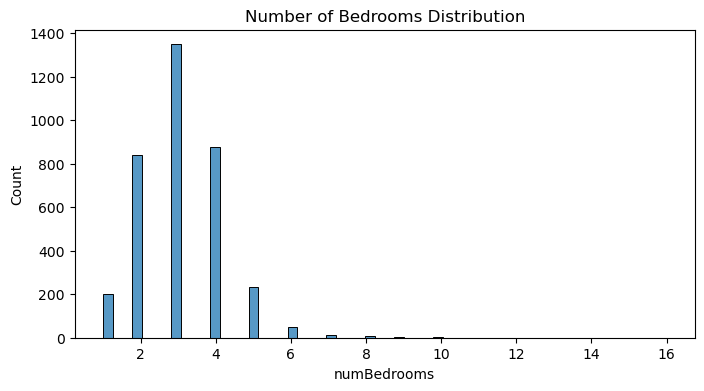

In [25]:
# bedrooms
plot_or_count_distribution(df, 'numBedrooms', 'Number of Bedrooms Distribution')

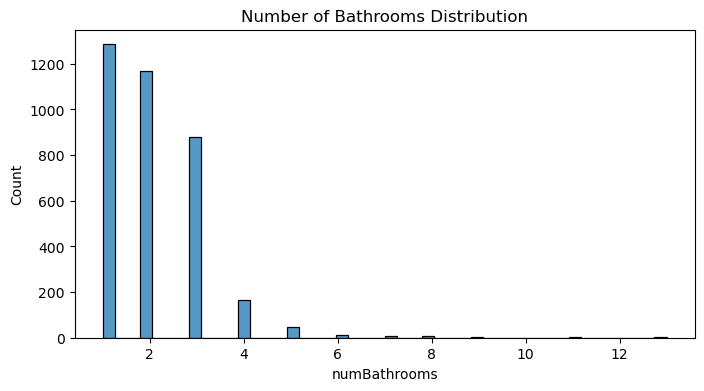

In [26]:
# bathrooms
plot_or_count_distribution(df, 'numBathrooms', 'Number of Bathrooms Distribution')

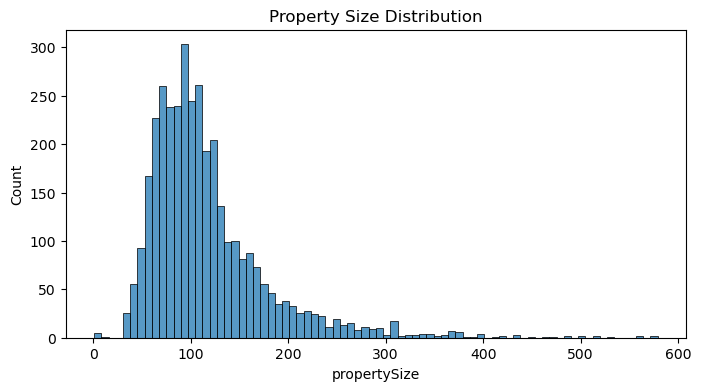

In [27]:
# property Size
plot_or_count_distribution(df, 'propertySize', 'Property Size Distribution')

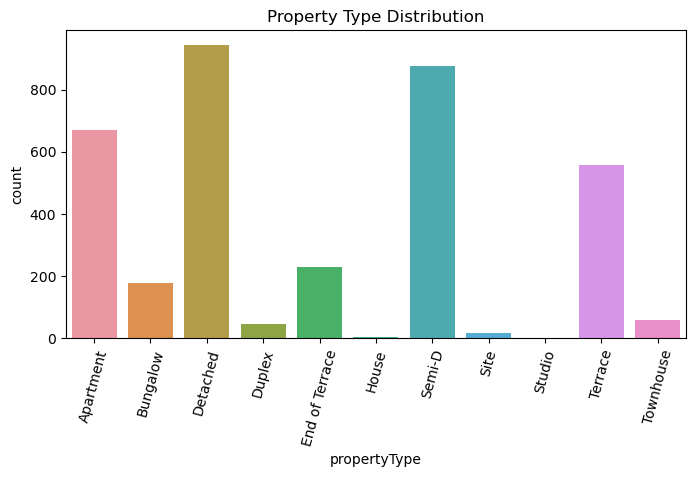

In [28]:
# property Type
plot_or_count_distribution(df, 'propertyType','Property Type Distribution' )

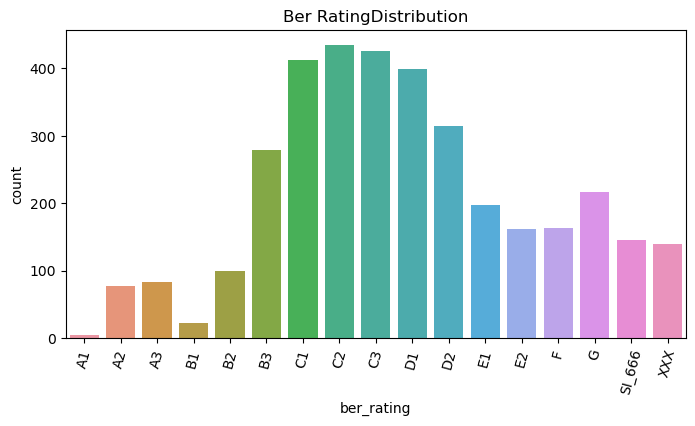

In [43]:
# ber rating
plot_or_count_distribution(df, 'ber_rating','Ber RatingDistribution' )

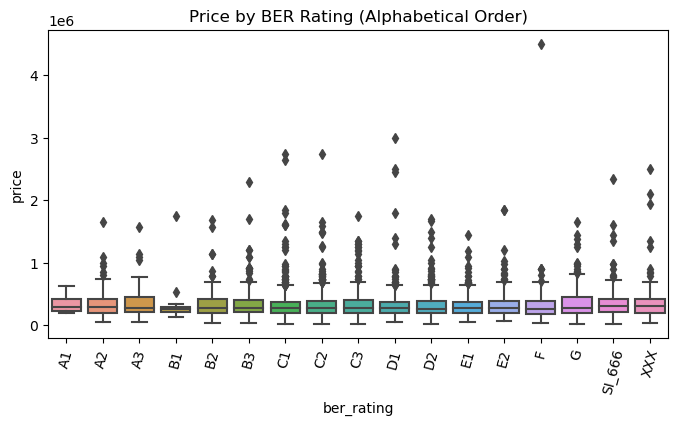

In [30]:
# ber rating
boxplot(df, 'ber_rating', 'price', 'Price by BER Rating (Alphabetical Order)')

In [31]:
most_expensive = df[df['price'] == 4500000]
most_expensive

price  numBedrooms  numBathrooms  propertySize  total_images  \
1217  4500000            5             6         450.0          21.0   

      longitude   latitude  publishDate_numeric ber_rating featuredLevel  \
1217  -9.368617  54.161705           1643414400          F      standard   

     propertyType       sellerType  
1217     Detached  UNBRANDED_AGENT

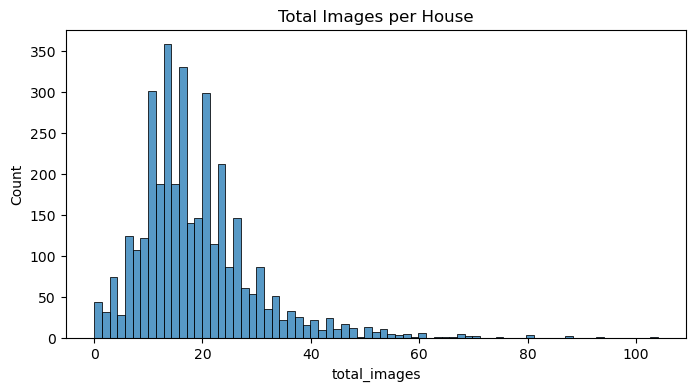

In [32]:
# 
plot_or_count_distribution(df, 'total_images','Total Images per House' )

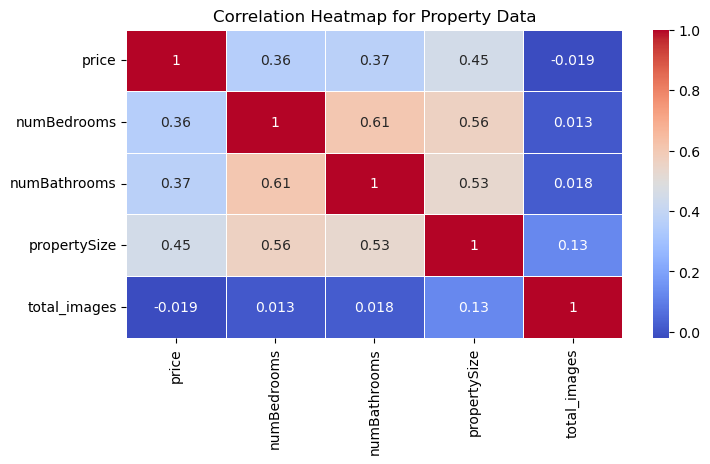

In [33]:
# last column added to better show correlation of the factors that actually matters
plot_correlation_heatmap(df, ['price', 'numBedrooms', 'numBathrooms', 'propertySize', 'total_images'], 'Correlation Heatmap for Property Data')

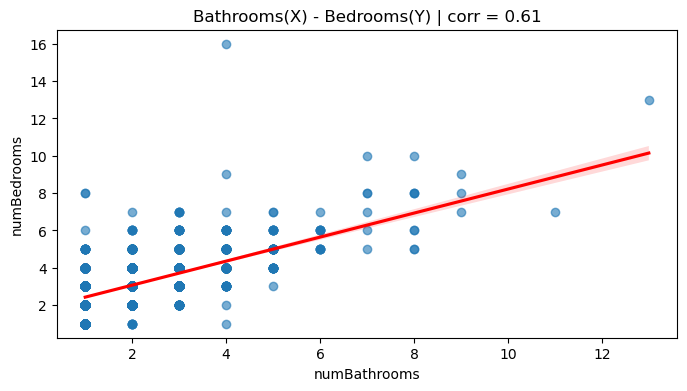

In [34]:
scatter_plot('numBathrooms', 'numBedrooms', 'Bathrooms(X) - Bedrooms(Y) | corr = 0.61')

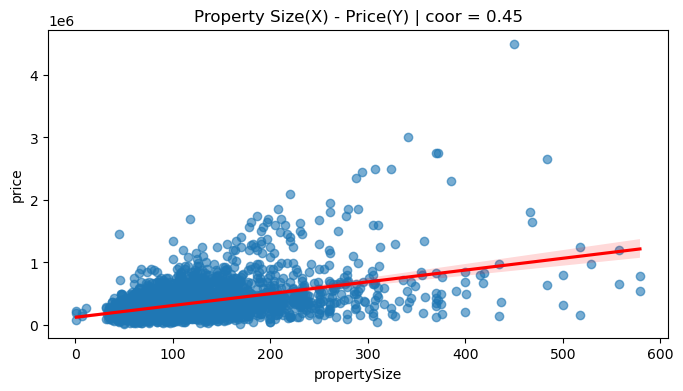

In [35]:
# scatter plot 
scatter_plot('propertySize', 'price', 'Property Size(X) - Price(Y) | coor = 0.45')

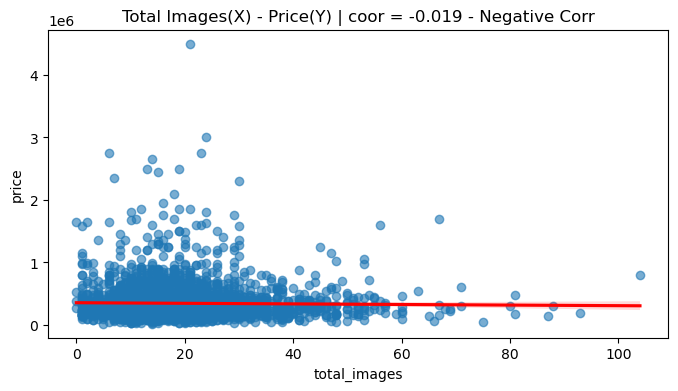

In [36]:
scatter_plot('total_images', 'price', 'Total Images(X) - Price(Y) | coor = -0.019 - Negative Corr')

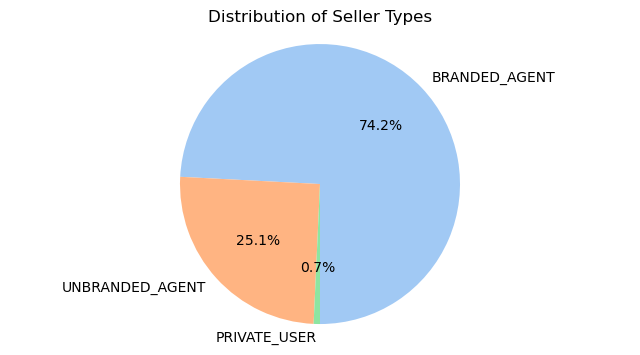

In [37]:
"""
​ Branded Agent: A professional real estate agent working under a recognized brand, 
providing comprehensive property marketing and listing services.
​ Unbranded Agent: An independent real estate agent without brand affiliation, 
offering more localized or limited property listing services.
​ Private User: A homeowner or landlord directly listing their property, 
handling the sale or rental themselves without using an agent.
"""
plot_pie_chart(df, 'sellerType', 'Distribution of Seller Types')

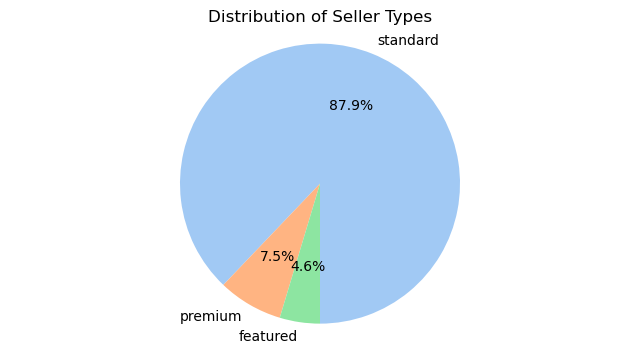

In [38]:
"""
​ Standard Ad: The basic listing with good value but appears below featured and premium ads in search results. 
It provides standard visibility on Daft.ie
​ Featured Ad: Positioned above standard ads, featured ads are larger and more visible to users, 
offering better prominence on listings
​ Premium Ad: Top placement with 4-6x more views, larger ad size, unlimited photos, 
and 30 days of priority, ensuring maximum exposure
"""
plot_pie_chart(df, 'featuredLevel', 'Distribution of Seller Types')

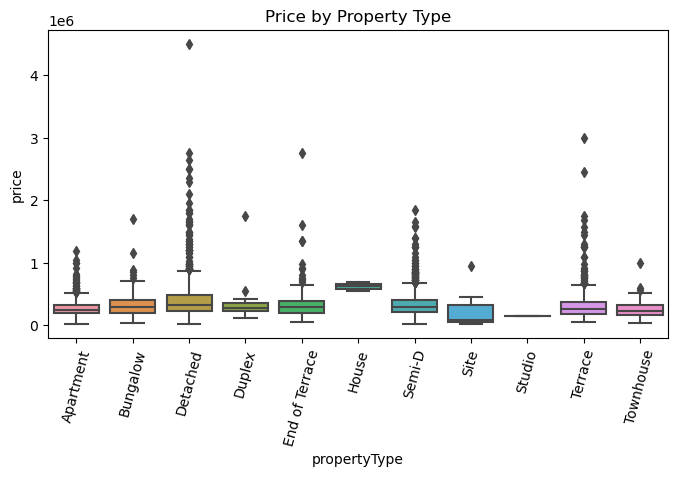

In [39]:
boxplot(df, 'propertyType', 'price', 'Price by Property Type')

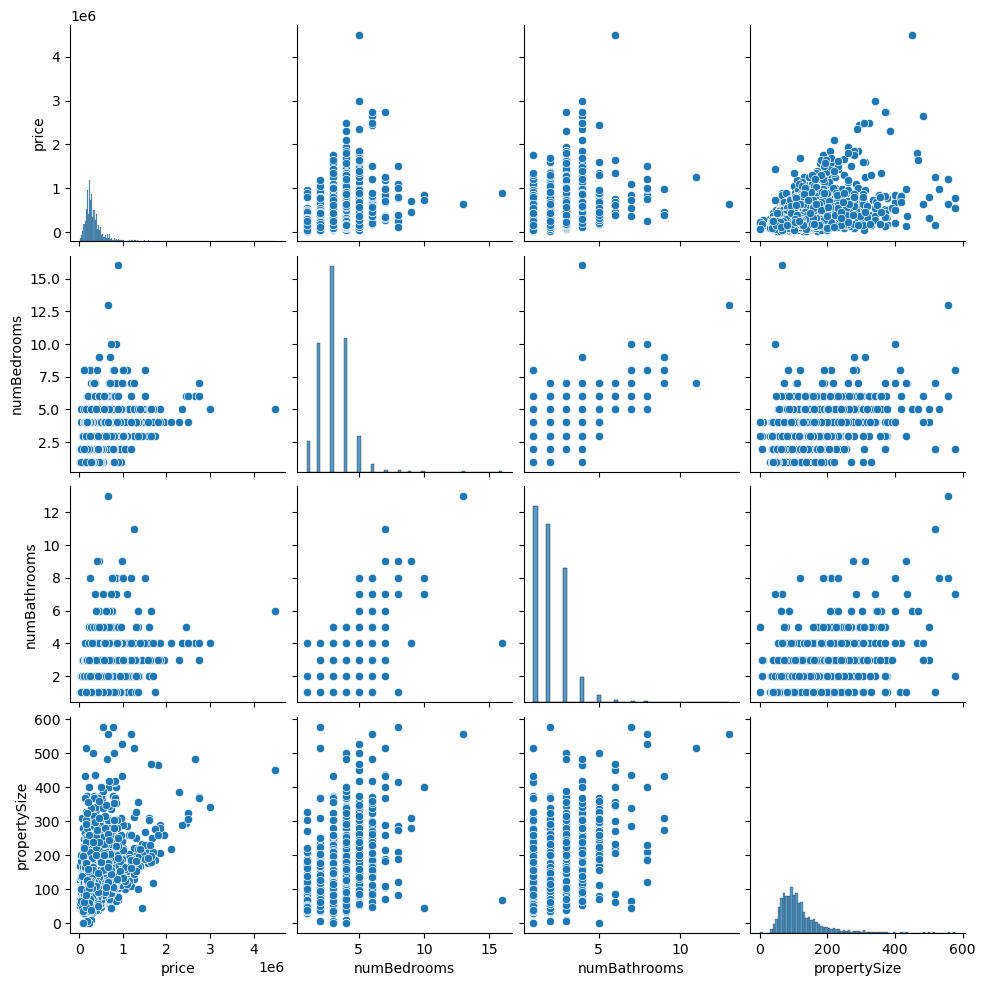

In [47]:
# pairplot 
sns.pairplot(df[['price', 'numBedrooms', 'numBathrooms', 'propertySize']])
plt.show()

<h1 align = 'center'>Functions</h1>

In [21]:
# display the amount in each column or to count the amount of houses
def plot_or_count_distribution(df, column_name, title):
    """
    # https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html
    if numeric use histplot
    else use counplot
    """
    plt.figure(figsize=(8, 4))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # Use histogram for numerical columns
        sns.histplot(df[column_name])
    else:
        # Sort alphabetically for BER Rating
        if column_name == 'ber_rating':
            sorted_order = sorted(df[column_name].unique())
        else:
            sorted_order = None
        
        sns.countplot(x=column_name, data=df, order=sorted_order)
        plt.xticks(rotation=75)  

    plt.title(title)
    plt.show()
    
    
# plots a correlation for called columns in the df
def plot_correlation_heatmap(df, columns, title):
    # Calculate the correlation
    corr = df[columns].corr()
    # Create the heatmap
    plt.figure(figsize=(8, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(title)
    plt.show()
        

# creates a scatter plot for two specified columns.
def scatter_plot(x, y, title):
    plt.figure(figsize=(8, 4))
    # Create scatter plot with regression line
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
# pie chart for a specified categorical column.
def plot_pie_chart(df, column_name, title):
    data = df[column_name].value_counts()
    
    # pie chart
    plt.figure(figsize=(8, 4))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=270, colors=sns.color_palette('pastel'))
    plt.title(title)
    plt.axis('equal') 
    plt.show()

    
# creates a sorted boxplot 
def boxplot(df, x, y, title):
    # Sort the x categories alphabetically
    sorted_order = sorted(df[x].unique())
    
    # Create the boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=x, y=y, data=df, order=sorted_order)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=75) 
    plt.show()